# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Rio Octaviannus Loka
- **Email:** rioloka86@gmail.com
- **ID Dicoding:** rio_octaviannus_loka

## Import Semua Packages/Library yang Digunakan

In [50]:
from google.colab import files
import os, shutil
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing import image

from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras.layers import TFSMLayer

## Data Preparation

### Data Loading

In [ ]:
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
!unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [4]:
source_train_directory = "Vegetable Images/train"
source_validation_directory = "Vegetable Images/validation"
source_test_directory = "Vegetable Images/test"
combined_directory = "vegetables/dataset"

os.makedirs(combined_directory, exist_ok=True)

In [5]:
def copy_images(source_directory, destination_directory):
  for subdir in os.listdir(source_directory):
    subdir_path = os.path.join(source_directory, subdir)
    if os.path.isdir(subdir_path):
      shutil.copytree(
          src=subdir_path,
          dst=os.path.join(destination_directory, subdir),
          dirs_exist_ok=True
          )

copy_images(source_train_directory, combined_directory)
copy_images(source_validation_directory, combined_directory)
copy_images(source_test_directory, combined_directory)

In [6]:
def print_images_resolution(dir):
  unique_sizes = set()
  total_images = 0

  for subdir in os.listdir(dir):
    subdir_path = os.path.join(dir, subdir)
    image_files = os.listdir(subdir_path)
    num_images = len(image_files)
    total_images += num_images
    print(f"Total Gambar di {subdir}: {num_images}")

    for img_file in image_files:
      img_path = os.path.join(subdir_path, img_file)
      with Image.open(img_path) as img:
        unique_sizes.add(img.size)

    print(f"Jumlah Resolusi Unik: {len(unique_sizes)}")
    print(f"Resolusi unik: {unique_sizes}")
    print("---------------")

  print(f"\nTotal Gambar: {total_images}")
print_images_resolution(combined_directory)

Total Gambar di Cucumber: 1400
Jumlah Resolusi Unik: 1
Resolusi unik: {(224, 224)}
---------------
Total Gambar di Pumpkin: 1400
Jumlah Resolusi Unik: 1
Resolusi unik: {(224, 224)}
---------------
Total Gambar di Brinjal: 1400
Jumlah Resolusi Unik: 1
Resolusi unik: {(224, 224)}
---------------
Total Gambar di Capsicum: 1400
Jumlah Resolusi Unik: 1
Resolusi unik: {(224, 224)}
---------------
Total Gambar di Tomato: 1400
Jumlah Resolusi Unik: 1
Resolusi unik: {(224, 224)}
---------------
Total Gambar di Bottle_Gourd: 1400
Jumlah Resolusi Unik: 1
Resolusi unik: {(224, 224)}
---------------
Total Gambar di Bean: 1400
Jumlah Resolusi Unik: 1
Resolusi unik: {(224, 224)}
---------------
Total Gambar di Papaya: 1400
Jumlah Resolusi Unik: 7
Resolusi unik: {(224, 211), (224, 224), (224, 198), (224, 223), (224, 207), (224, 210), (224, 187)}
---------------
Total Gambar di Radish: 1400
Jumlah Resolusi Unik: 7
Resolusi unik: {(224, 211), (224, 224), (224, 198), (224, 223), (224, 207), (224, 210), (

In [7]:
file_paths = []
file_names  = []
labels     = []

for path, subdir, files in os.walk(combined_directory):
  for image in files:
    file_paths.append(os.path.join(path, image))
    file_names.append(image)
    labels.append(os.path.basename(path))

df = pd.DataFrame({
    "file_paths": file_paths,
    "file_names": file_names,
    "labels": labels
})
df

file_paths file_names    labels
0      vegetables/dataset/Cucumber/0486.jpg   0486.jpg  Cucumber
1      vegetables/dataset/Cucumber/0035.jpg   0035.jpg  Cucumber
2      vegetables/dataset/Cucumber/1180.jpg   1180.jpg  Cucumber
3      vegetables/dataset/Cucumber/0463.jpg   0463.jpg  Cucumber
4      vegetables/dataset/Cucumber/0551.jpg   0551.jpg  Cucumber
...                                     ...        ...       ...
20995    vegetables/dataset/Potato/1059.jpg   1059.jpg    Potato
20996    vegetables/dataset/Potato/1369.jpg   1369.jpg    Potato
20997    vegetables/dataset/Potato/1361.jpg   1361.jpg    Potato
20998    vegetables/dataset/Potato/0106.jpg   0106.jpg    Potato
20999    vegetables/dataset/Potato/0281.jpg   0281.jpg    Potato

[21000 rows x 3 columns]

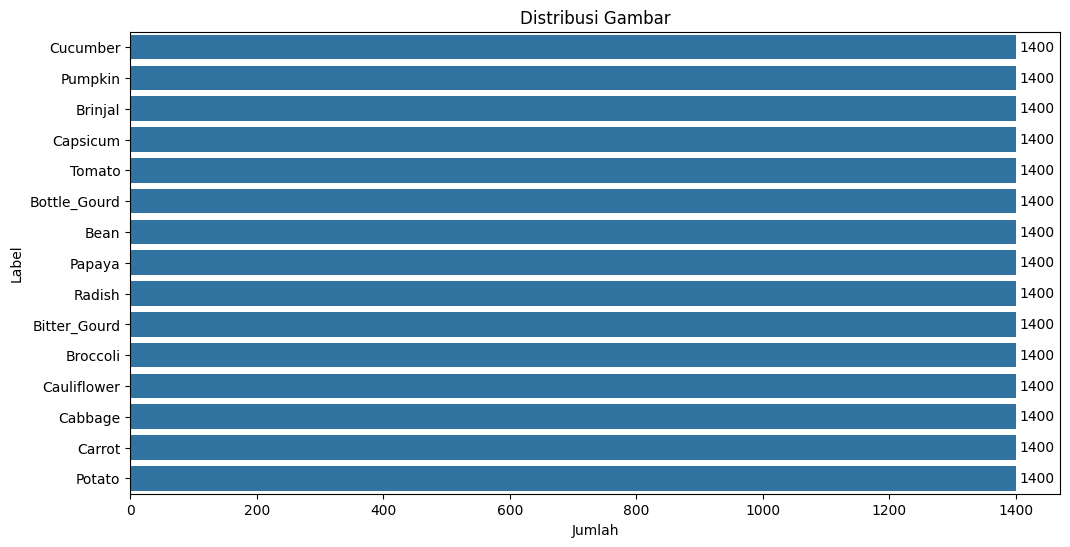

In [8]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=labels)

for p in ax.patches:
    count = int(p.get_width())
    ax.text(p.get_width() + 5,
            p.get_y() + p.get_height() / 2,
            str(count),
            va='center')

plt.xlabel("Jumlah")
plt.ylabel("Label")
plt.title("Distribusi Gambar")
plt.show()

### Data Preprocessing

#### Split Dataset

Membagi dataset menjadi train (70%), validation(15%), test(15%)

In [9]:
X = df["file_paths"]
y = df["labels"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=100)
print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data validation: {len(X_val)}")
print(f"Jumlah data test: {len(X_test)}")

Jumlah data train: 14700
Jumlah data validation: 3150
Jumlah data test: 3150


In [10]:
for split, X_split, y_split in zip(['train', 'val', 'test'],
                                   [X_train, X_val, X_test],
                                   [y_train, y_val, y_test]):
    for file_path, label in zip(X_split, y_split):
        dest_dir = os.path.join("vegetables", split, label)
        os.makedirs(dest_dir, exist_ok=True)

        filename = os.path.basename(file_path)
        dest_path = os.path.join(dest_dir, filename)
        shutil.copy2(file_path, dest_path)

In [ ]:
def print_total_images(dir):
  total_image = 0
  for subdir in os.listdir(dir):
    image_path = os.path.join(dir, subdir)
    total_image = total_image + len(os.listdir(image_path))
    print(f"Total gambar di {subdir}:", len(os.listdir(image_path)))
  print(f"\nTotal train dataset:", total_image)
  print("------------------------------------------\n")

train_path = "vegetables/train"
val_path = "vegetables/val"
test_path = "vegetables/test"

print_total_images(train_path)
print_total_images(val_path)
print_total_images(test_path)

Total gambar di Cucumber: 965
Total gambar di Pumpkin: 962
Total gambar di Brinjal: 954
Total gambar di Capsicum: 1010
Total gambar di Tomato: 978
Total gambar di Bottle_Gourd: 979
Total gambar di Bean: 955
Total gambar di Papaya: 997
Total gambar di Radish: 1006
Total gambar di Bitter_Gourd: 979
Total gambar di Broccoli: 980
Total gambar di Cauliflower: 986
Total gambar di Cabbage: 960
Total gambar di Carrot: 995
Total gambar di Potato: 994

Total train dataset: 14700
------------------------------------------

Total gambar di Cucumber: 228
Total gambar di Pumpkin: 211
Total gambar di Brinjal: 220
Total gambar di Capsicum: 197
Total gambar di Tomato: 212
Total gambar di Bottle_Gourd: 222
Total gambar di Bean: 212
Total gambar di Papaya: 203
Total gambar di Radish: 191
Total gambar di Bitter_Gourd: 220
Total gambar di Broccoli: 203
Total gambar di Cauliflower: 220
Total gambar di Cabbage: 211
Total gambar di Carrot: 212
Total gambar di Potato: 188

Total train dataset: 3150
-----------

In [12]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    )

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
    )

val_generator = datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
    )

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
    )

Found 14700 images belonging to 15 classes.
Found 3150 images belonging to 15 classes.
Found 3150 images belonging to 15 classes.


## Modelling

In [19]:
early_stop = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai > 95%!")
      self.model.stop_training = True

callbacks_list = [early_stop, myCallback()]

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,291,759 (12.56 MB)

 Trainable params: 3,291,503 (12.56 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [21]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks_list
)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.2420 - loss: 2.7780 - val_accuracy: 0.4902 - val_loss: 1.6120
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.4324 - loss: 1.7469 - val_accuracy: 0.6489 - val_loss: 1.1421
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.5131 - loss: 1.4776 - val_accuracy: 0.5721 - val_loss: 1.4602
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.5789 - loss: 1.2964 - val_accuracy: 0.7749 - val_loss: 0.8210
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.6158 - loss: 1.1404 - val_accuracy: 0.7771 - val_loss: 0.7238
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.6649 - loss: 0.9922 - val_accuracy: 0.8340 - val_loss: 0.5645
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.7042 - loss: 0.9171 - val_accuracy: 0.8371 - val_loss: 0.6406
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.7325 - loss: 0.8496 - 

## Evaluasi dan Visualisasi

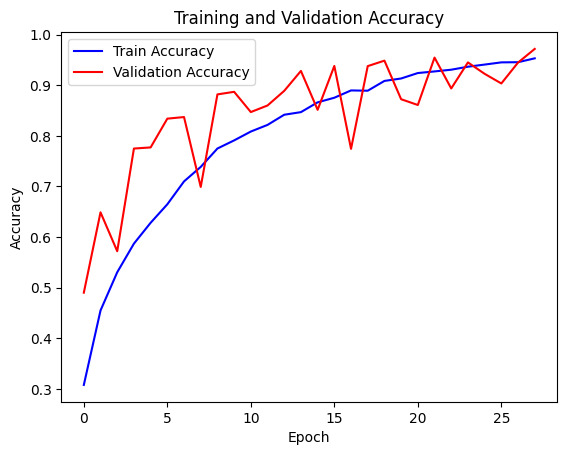

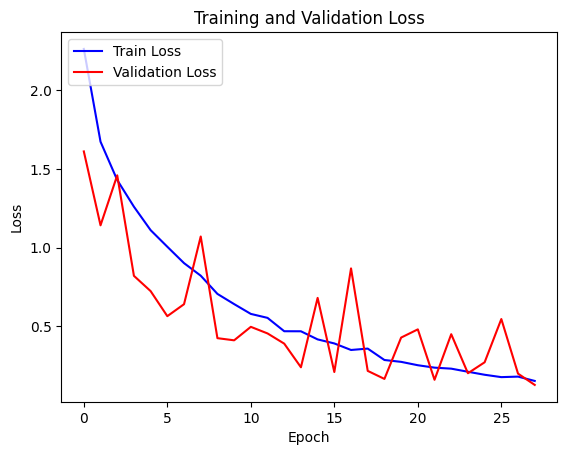

In [35]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
              precision    recall  f1-score   support

        Bean       0.97      0.98      0.97       233
Bitter_Gourd       0.99      0.99      0.99       201
Bottle_Gourd       0.99      0.96      0.97       199
     Brinjal       0.96      0.91      0.93       226
    Broccoli       0.99      0.92      0.95       217
     Cabbage       0.83      1.00      0.91       229
    Capsicum       0.98      1.00      0.99       193
      Carrot       0.98      1.00      0.99       193
 Cauliflower       0.99      0.96      0.98       194
    Cucumber       0.98      0.95      0.96       207
      Papaya       0.98      0.98      0.98       200
      Potato       0.99      1.00      0.99       218
     Pumpkin       0.96      0.98      0.97       227
      Radish       0.99      0.99      0.99       203
      Tomato       0.98      0.90      0.94       210

    accuracy                           0.97      3150
   macro avg       0.97      0.97   

In [30]:
test_generator.reset()

test_loss, test_acc = model.evaluate(test_generator)
print(f"Akurasi Testing: {test_acc}")
print(f"Loss Testing: {test_loss}")

3150/3150 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9689 - loss: 0.1212
Akurasi Testing: 0.967301607131958
Loss Testing: 0.12516672909259796


## Konversi Model

### SavedModel

In [38]:
tf.saved_model.save(model, "saved_model")

### TF-Lite

In [44]:
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

os.makedirs("tflite", exist_ok=True)

with open("tflite/model.tflite", "wb") as f:
  f.write(tflite_model)

labels = list(train_generator.class_indices.keys())
with open("tflite/labels.txt", "w") as f:
  f.write("\n".join(labels))

### TFJS

In [46]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=tf_saved_model \
  --output_format=tfjs_graph_model \
  saved_model tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-04-20 14:17:18.998229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745158639.017609   20514 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:174

## Inference (Optional)

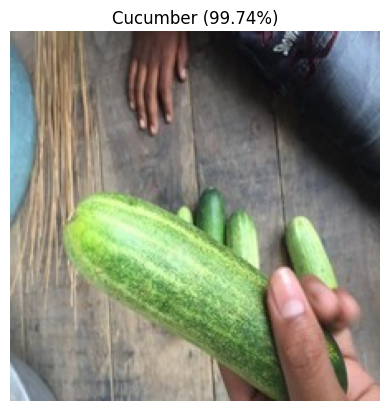

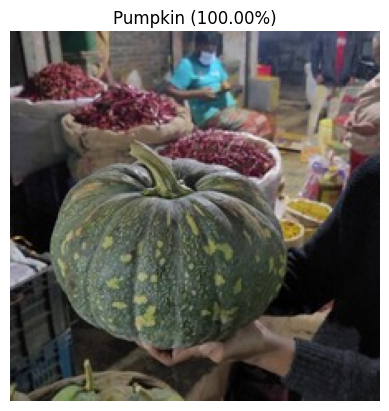

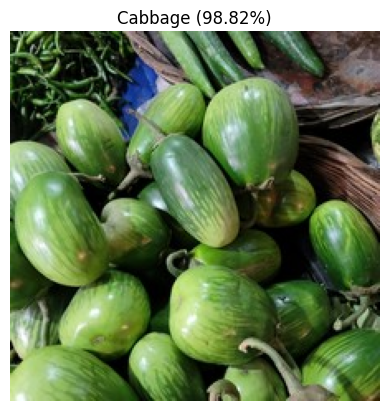

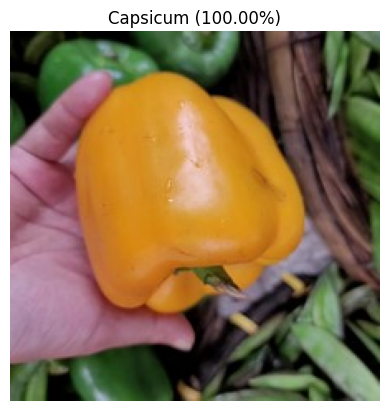

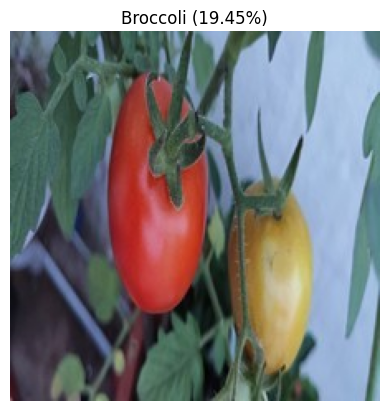

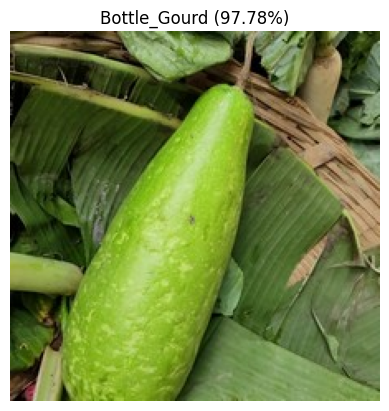

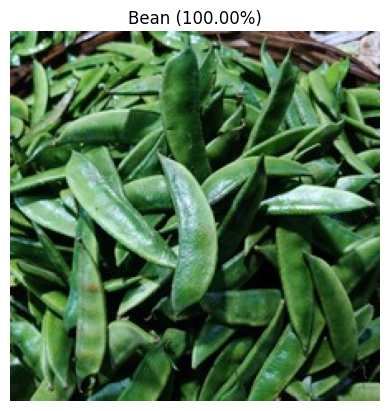

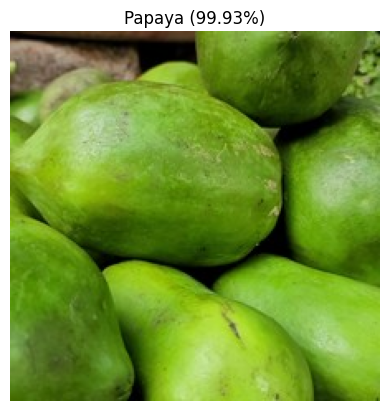

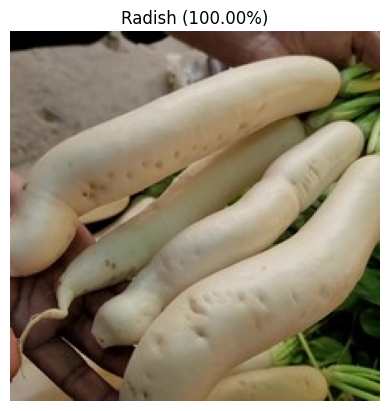

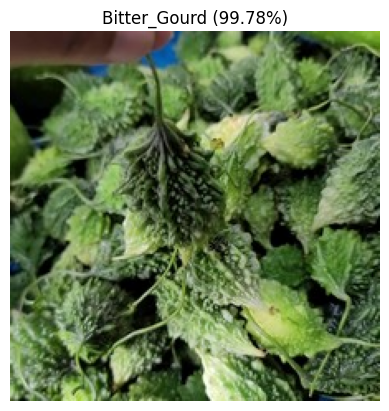

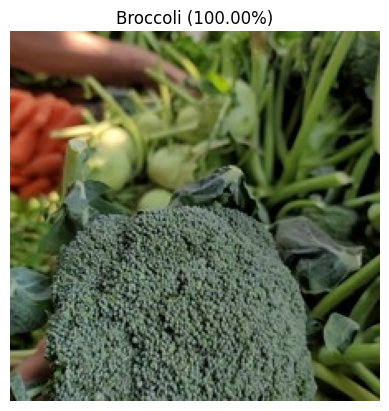

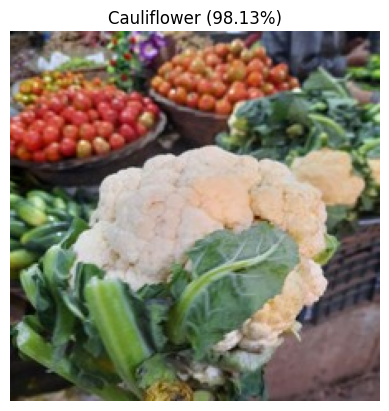

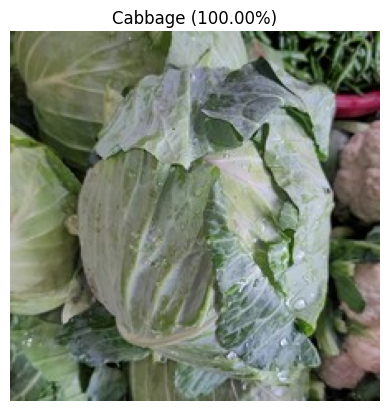

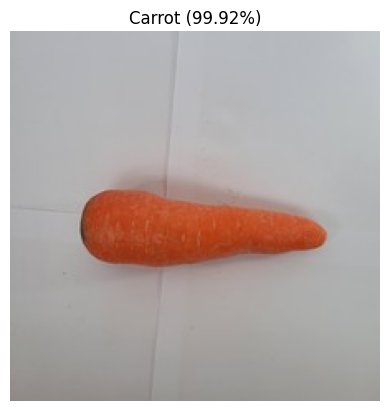

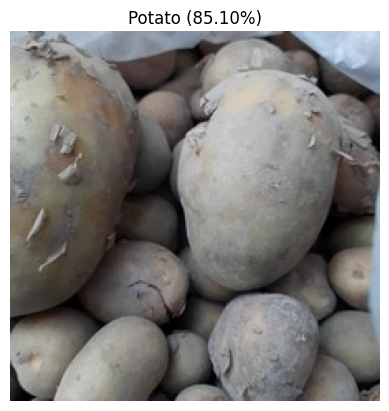

In [60]:
model_sm = TFSMLayer('saved_model', call_endpoint='serving_default')

def predict_image(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)

  prediction_dict = model_sm(img_array)
  key = list(prediction_dict.keys())[0]

  prediction = prediction_dict[key].numpy()[0]
  predicted_index = np.argmax(prediction)
  predicted_label = labels[predicted_index]

  return [prediction, predicted_label]

for subdir in os.listdir(test_path):
  img_path = os.path.join(test_path, subdir, os.listdir(os.path.join(test_path, subdir))[0])
  probability, label = predict_image(img_path)

  img = image.load_img(img_path, target_size=(224, 224))
  plt.imshow(img)
  plt.title(f"{label} ({np.max(probability) * 100:.2f}%)")
  plt.axis('off')
  plt.show()